# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [1]:
# Libraries
import numpy as np
import pandas as pd
import regex as re
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline 
#Since we are using Jupyter notebook, 
#This ensures that our visualizations will render in the notebook itself.

## Challenge 1

#### The data we will use in this challenge is:

In [2]:
x = np.arange(0,100)
y = x*2
z = x**2

#### Plot (x, y) and (x, z).
There are 2 ways of doing this. Do in both ways.

**Hint**: Check out the nrows, ncols and index arguments of subplots. 

Also, play around with the linewidth and style. Use the ones you're most happy with.

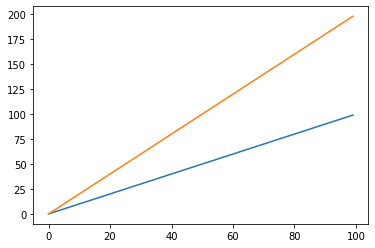

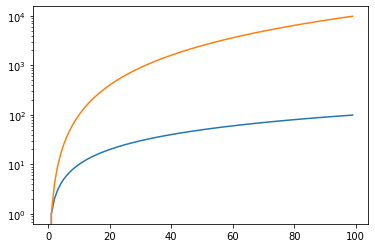

In [3]:
# Method 1
plt.plot(x)
plt.plot(y)
plt.show()
plt.plot(x)
plt.plot(z)
plt.yscale('log') #aha really hard to represent that in linear, but log doesn't help neither
plt.show()

#### Use plt.subplots(nrows=1, ncols=2) to create the plot.

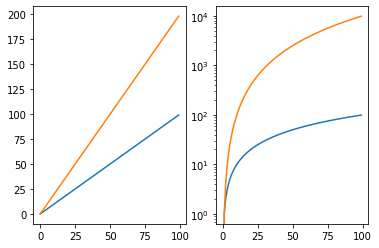

In [4]:
fig, [ax1, ax2] = plt.subplots(1,2)
ax1.plot(x)
ax1.plot(y)

ax2.plot(x)
ax2.plot(z)
plt.yscale('log')

plt.show()

#### Use your previous code but now, resize your plot.
**Hint**: Add the figsize argument in plt.subplots().

If you want, try to add a title to the plot or even axes labels. You can also play with the fontweight and fontsize of the titles and labels. 

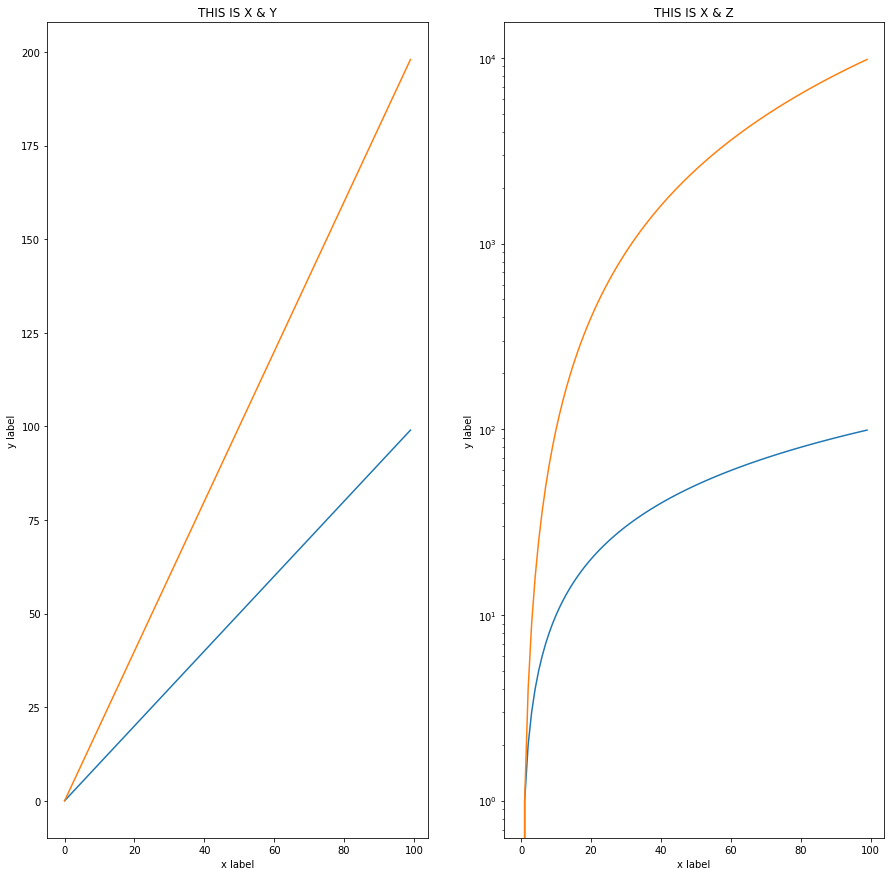

In [5]:
# your code here
fig, [ax1, ax2] = plt.subplots(1,2, figsize=(15,15))
ax1.plot(x)
ax1.plot(y)
ax1.set_title('THIS IS X & Y')
ax1.set_xlabel('x label')
ax1.set_ylabel('y label')

ax2.plot(x)
ax2.plot(z)
plt.yscale('log')
ax2.set_title('THIS IS X & Z')
ax2.set_xlabel('x label')
ax2.set_ylabel('y label')

plt.show()

#### Plot both $y=x^2$ and $y=e^x$ in the same plot using normal and logarithmic scale.
**Hint**: Use `set_xscale` and `set_yscale`.

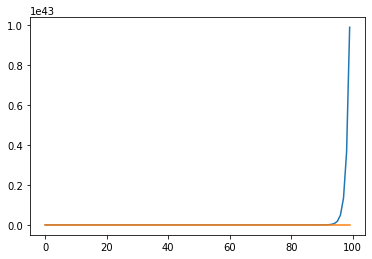

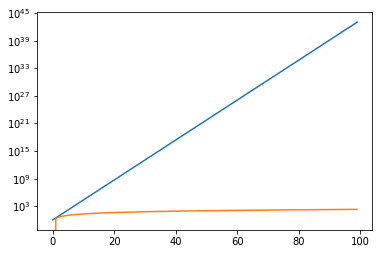

In [6]:
# your code here
o = x*2
i = np.exp(x)

plt.plot(i)
plt.plot(o)
plt.show()

plt.plot(i)
plt.plot(o)
plt.yscale('log')
plt.show()


#### As a bonus challenge, try to add a legend to the plot.

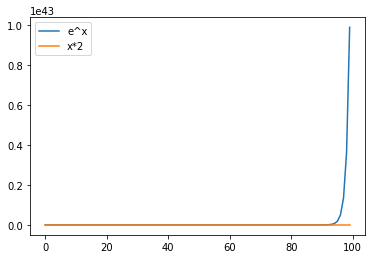

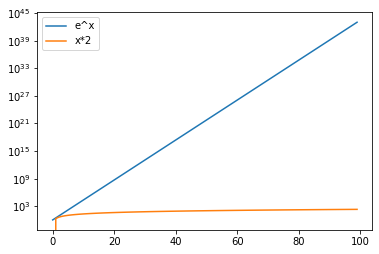

In [7]:
# your code here
o = x*2
i = np.exp(x)

plt.plot(i, label='e^x')
plt.plot(o, label='x*2')
plt.legend()
plt.show()

plt.plot(i, label='e^x')
plt.plot(o, label='x*2')
plt.legend()
plt.yscale('log')
plt.show()

## Challenge 2
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. You can find the dataset in Ironhack's database:
* db: `fitbit`
* table: `fitbit2`

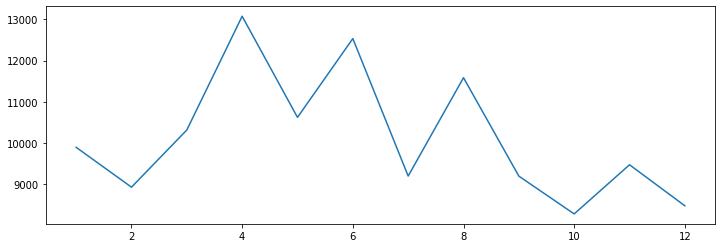

([<matplotlib.axis.XTick at 0x12c1f490>,
 [Text(0, 0, ''), Text(0, 0, '')])

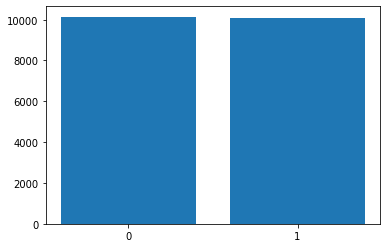

In [8]:
fitbit = pd.read_csv('fitbit2.csv')

mean_steps = fitbit.groupby(['Months_encoded']).mean()['Steps']
plt.figure(figsize=(12,4))
plt.plot(mean_steps)
plt.show()

mean_steps_2 = fitbit.groupby(['Work_or_Weekend']).mean()['Steps']

plt.bar(fitbit['Work_or_Weekend'].unique(), mean_steps_2)

plt.xticks(np.arange(0, 2, 1))



#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays? All plots must be in the same jupyter notebook cell.

**Hints**:

* Use Months_encoded and Week_or Weekend columns.
* Use matplolib.pyplot object oriented API.
* Set your size figure to 12,4
* Explore plt.sca
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

In [9]:
# MEDIAN STEPS BY MONTH_ENCODED
# your code here

# MEDIAN STEPS BY WORK_OR_WEEKEND
# your code here

#### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

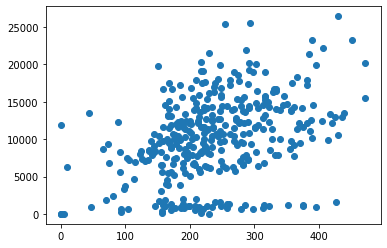

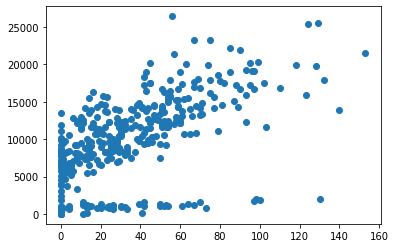

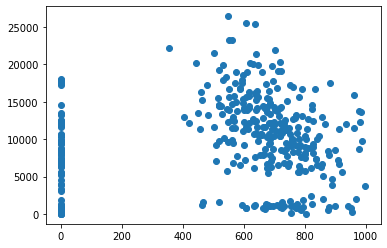

In [10]:
# your code here
columns = ['Minutes Lightly Active', 'Minutes Very Active', 'Minutes Sedentary']

for column in columns:
    plt.scatter(fitbit[column], fitbit['Steps'])
    plt.show()

## Challenge 3

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

In [11]:
# your code here
titanic = pd.read_csv('titanic.csv')

#### Explore the titanic dataset using Pandas dtypes.

In [12]:
# your code here
titanic.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [13]:
# NUMERICAL VARIABLES
# your code here
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,655.000000,0.383838,2.294882,29.879186,0.498854,0.385027,33.281086
std,378.020061,0.486592,0.837836,13.448335,1.041658,0.865560,51.741500
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.500000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,37.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [14]:
# CATEGORICAL VARIABLES
# your code here
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Gender       1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        1309 non-null   object 
 11  Embarked     1309 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 97.2+ KB


#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

In [15]:
# your code here
plt.style.use('classic')
plt.figure(figsize=(12,6))

<Figure size 960x480 with 0 Axes>

<Figure size 960x480 with 0 Axes>

#### Use the right visulalization to show the distribution of column `Age`.

<AxesSubplot:>

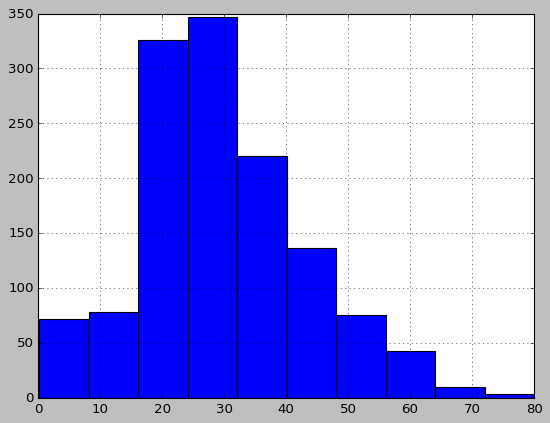

In [16]:
# your code here
titanic['Age'].hist()

#### Use subplots and plot the distribution of the `Age`  with bins equal to 10, 20 and 50.

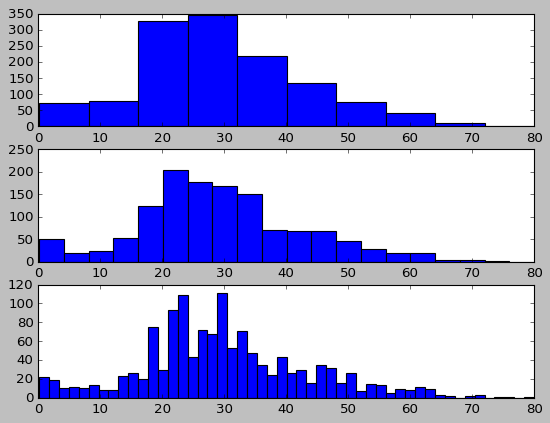

In [17]:
# your code here
fig, [ax1, ax2, ax3] = plt.subplots(3,1)
ax1.hist(titanic['Age'], bins=10)
ax2.hist(titanic['Age'], bins=20)
ax3.hist(titanic['Age'], bins=50)


plt.show()



#### How does the bin size affect your plot?

In [18]:
"""
Less bins = More granular data
"""

'\nLess bins = More granular data\n'

#### Use seaborn to show the distribution of column `Age`.

c:\users\xico2\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

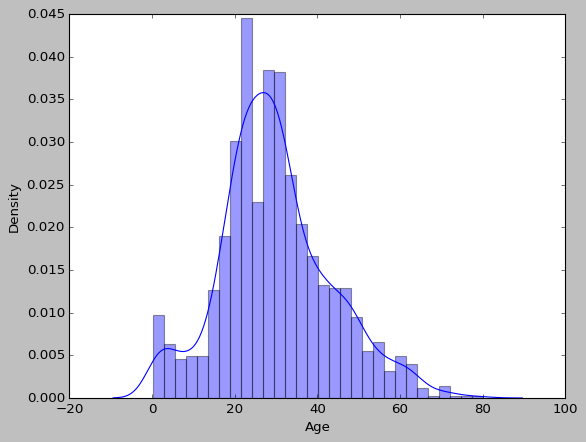

In [19]:
# your code here
sns.distplot(titanic['Age'])

#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

<BarContainer object of 2 artists>

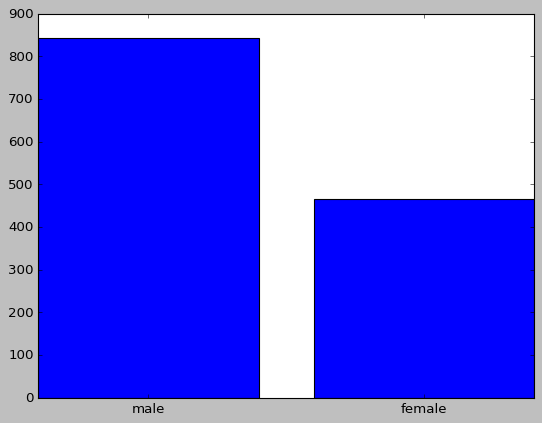

In [20]:
# Method 1 - matplotlib
# your code here
#plt.bar(titanic['Gender'].value_counts(), height=900)
plt.bar(titanic['Gender'].unique(), titanic['Gender'].value_counts())

<AxesSubplot:xlabel='Gender', ylabel='Gender'>

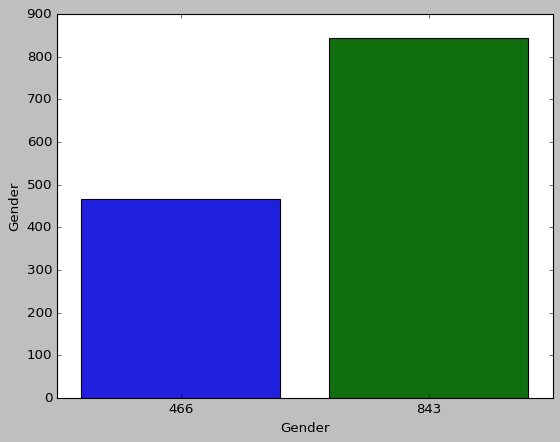

In [21]:
# Method 2 - seaborn
# your code here
sns.barplot(data = titanic
            ,x = titanic['Gender'].value_counts()
            ,y = titanic['Gender'].value_counts()
            )

#### Use the right plot to visualize the column `Pclass`.

([<matplotlib.axis.XTick at 0x12adc630>,
 [Text(1, 0, 'Pclass 1'), Text(2, 0, 'Pclass 2'), Text(3, 0, 'Pclass 3')])

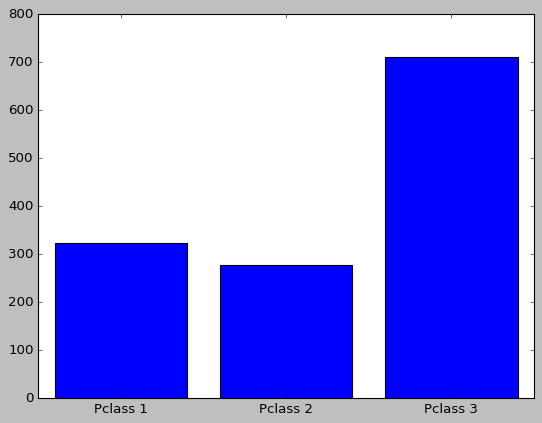

In [22]:
# your code here

plt.bar(titanic['Pclass'].unique(), titanic['Pclass'].value_counts())
plt.xticks(np.arange(1, 4, step=1), ( 'Pclass 1', 'Pclass 2', 'Pclass 3'))

#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it. 

In [23]:
# your code here
#sns.pairplot(titanic, hue = 'Age')
#sns.pairplot(titanic)


<AxesSubplot:ylabel='Age'>

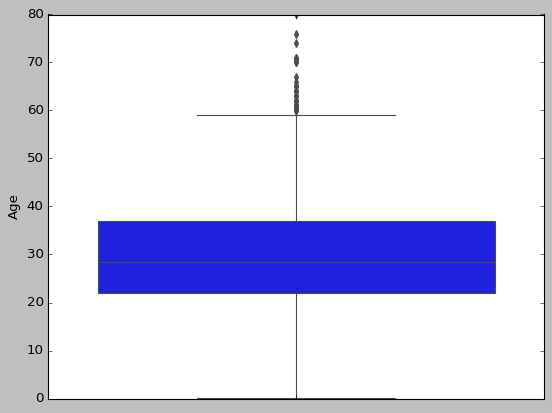

In [24]:
"""
your comments here
"""
sns.boxplot(y='Age', data = titanic)


#### What does the last plot tell you about the feature `Age`?

In [25]:
"""
With this plot we are able to see (“minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”) of the column 'Age'
It also gives us the outliers for Age
It tells use if the data is symmetrical and how tightly our data is grouped, and if and how our data is skewed.

We can see that most ages are between 21 and 39, showing a meadian value near 29
"""


"\nWith this plot we are able to see (“minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”) of the column 'Age'\nIt also gives us the outliers for Age\nIt tells use if the data is symmetrical and how tightly our data is grouped, and if and how our data is skewed.\n\nWe can see that most ages are between 21 and 39, showing a meadian value near 29\n"

#### Now in addition to the summary statistics, we want to have in the same plot the distribution of `Age`. What kind of plot would you use? Plot it. 

c:\users\xico2\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Age'>

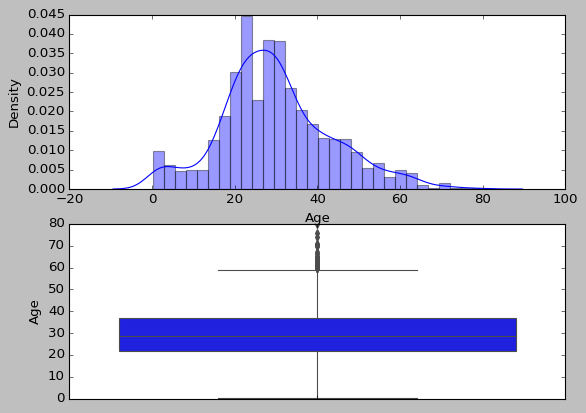

In [26]:
# your code here
fig, axes = plt.subplots(2, 1)
sns.distplot(titanic['Age'], ax=axes[0])
sns.boxplot(y='Age', data = titanic, orient='v' , ax=axes[1])

#### What additional information does the last plot provide about feature `Age`?

In [27]:
"""
your comments here
Gives us the distribution of the Age column across all tripulants.  
"""

'\nyour comments here\nGives us the distribution of the Age column across all tripulants.  \n'

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

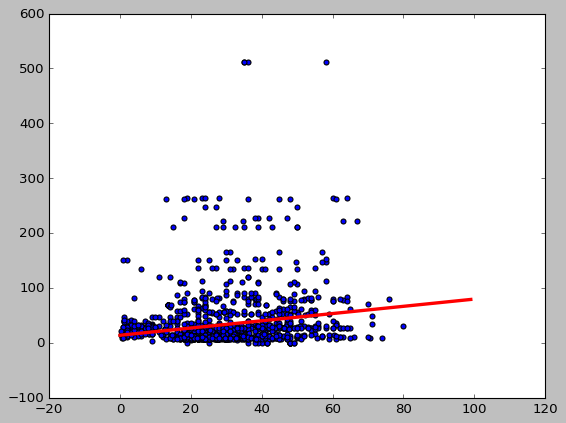

In [43]:
# Method 1 - matplotlib
# your code here
plt.scatter(titanic['Age'], titanic['Fare'])
#plt.plot(np.unique('Age'), np.poly1d(np.polyfit('Age', 'Fare', 1))(np.unique('Age')))
m, b = np.polyfit(titanic['Age'], titanic['Fare'], 1)

plt.plot(x, m*x + b, linewidth=3, color='r')

plt.show()


<AxesSubplot:xlabel='Age', ylabel='Fare'>

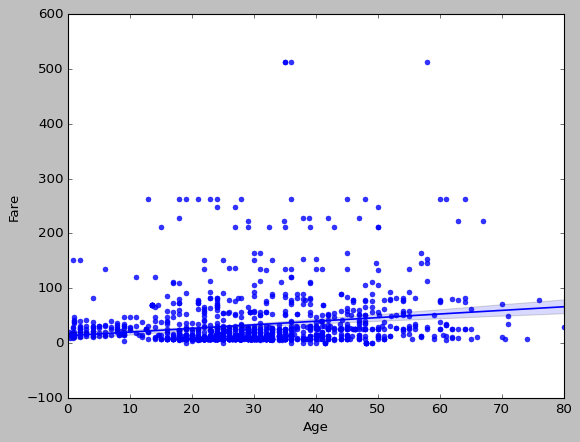

In [48]:
# Method 2 - seaborn
# your code here
sns.regplot(x='Age', y='Fare', data=titanic, color='b')

#we can definitely see an a postivie relation/correlation between 'Age' and 'Fare'

#### Plot the correlation matrix using seaborn.

<AxesSubplot:>

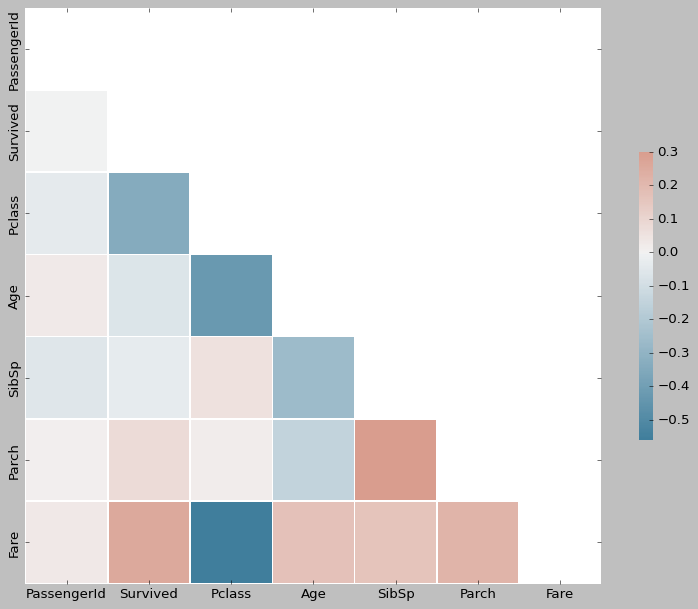

In [47]:
# your code here

# Compute the correlation matrix
corr = titanic.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

#### What are the most correlated features?

In [31]:
"""
your comments here
The most correlated features are (Fare, Survived) (Parch, SibSp)
"""

'\nyour comments here\n'

#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

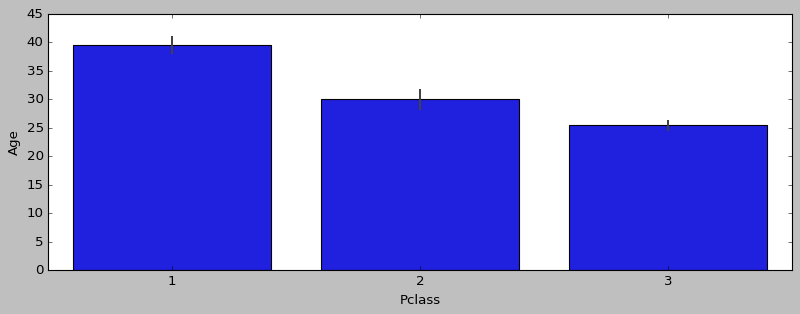

In [65]:
# your code here
plt.figure(figsize=(12, 4))
sns.barplot(x='Pclass', y='Age', data=titanic, color='b')



In [53]:
##### Use seaborn to plot the distribution of Age based on the Gender.
#Hint: Use Facetgrid.

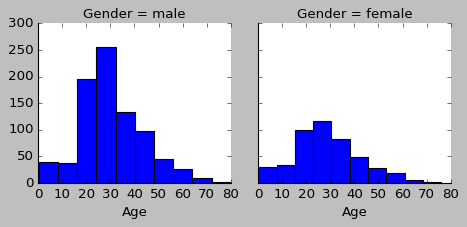

In [74]:
#sns.FacetGrid(x='Gender', y='Age', data=titanic)
g = sns.FacetGrid(titanic, col = "Gender")
g.map(plt.hist, "Age")
plt.show()